# 🧪 DeepFake Detection Demo (TFLite) on Google Colab
This notebook trains a simple CNN model, converts it to TensorFlow Lite, and runs inference on uploaded images.

In [8]:
# ✅ Step 1: Install Dependencies
!pip install -q tensorflow matplotlib opencv-python
!pip install ai_edge_litert


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 91.2/91.2 MB 10.6 MB/s eta 0:00:00


In [2]:
# ✅ Step 2: Import Libraries
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
import matplotlib.pyplot as plt
from PIL import Image
import cv2, os
print("TensorFlow version:", tf.__version__)

TensorFlow version: 2.19.0


In [3]:
# ✅ Step 3: Create and Train Dummy CNN Model
# For demo purposes only, we use random data
x_train = np.random.rand(100, 128, 128, 3)
y_train = np.random.randint(0, 2, size=(100,))

model = Sequential([
    Conv2D(16, (3, 3), activation='relu', input_shape=(128, 128, 3)),
    MaxPooling2D(2, 2),
    Conv2D(32, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Flatten(),
    Dense(64, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.fit(x_train, y_train, epochs=3, batch_size=8)

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/3
13/13 ━━━━━━━━━━━━━━━━━━━━ 6s 296ms/step - accuracy: 0.5133 - loss: 1.0002
Epoch 2/3
13/13 ━━━━━━━━━━━━━━━━━━━━ 4s 188ms/step - accuracy: 0.5104 - loss: 0.7325
Epoch 3/3
13/13 ━━━━━━━━━━━━━━━━━━━━ 3s 205ms/step - accuracy: 0.5223 - loss: 0.6911


In [4]:
# ✅ Step 4: Save and Convert Model to TFLite
model.save("deepfake_model.h5")
converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()

with open("deepfake_model.tflite", "wb") as f:
    f.write(tflite_model)

print("Model converted and saved as .tflite")

Saved artifact at '/tmp/tmp73dp3hvw'. The following endpoints are available:

* Endpoint 'serve'
  args_0 (POSITIONAL_ONLY): TensorSpec(shape=(None, 128, 128, 3), dtype=tf.float32, name='keras_tensor')
Output Type:
  TensorSpec(shape=(None, 1), dtype=tf.float32, name=None)
Captures:
  132780236505168: TensorSpec(shape=(), dtype=tf.resource, name=None)
  132780236505936: TensorSpec(shape=(), dtype=tf.resource, name=None)
  132780236507472: TensorSpec(shape=(), dtype=tf.resource, name=None)
  132780236505552: TensorSpec(shape=(), dtype=tf.resource, name=None)
  132780236506896: TensorSpec(shape=(), dtype=tf.resource, name=None)
  132780236509200: TensorSpec(shape=(), dtype=tf.resource, name=None)
  132780239403728: TensorSpec(shape=(), dtype=tf.resource, name=None)
  132780236507088: TensorSpec(shape=(), dtype=tf.resource, name=None)
Model converted and saved as .tflite


Saving Tangkapan Layar 2025-12-17 pukul 1.47.35 PM.png to Tangkapan Layar 2025-12-17 pukul 1.47.35 PM.png


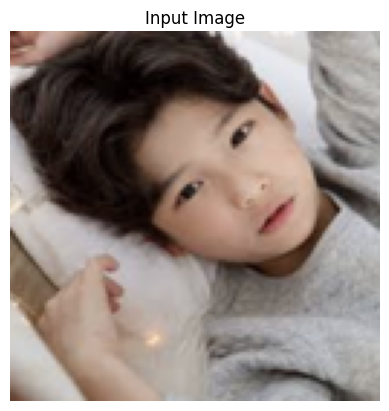

In [5]:
# ✅ Step 5: Upload and Preprocess Test Image
from google.colab import files
uploaded = files.upload()

img_path = list(uploaded.keys())[0]
image = Image.open(img_path).resize((128, 128)).convert("RGB")
input_array = np.expand_dims(np.array(image) / 255.0, axis=0).astype(np.float32)
plt.imshow(image)
plt.title("Input Image")
plt.axis('off')
plt.show()

In [11]:
# ✅ Step 6: Load and Run TFLite Inference
interpreter = tf.lite.Interpreter(model_path="deepfake_model.tflite")
interpreter.allocate_tensors()
input_index = interpreter.get_input_details()[0]['index']
output_index = interpreter.get_output_details()[0]['index']

interpreter.set_tensor(input_index, input_array)
interpreter.invoke()

output = interpreter.get_tensor(output_index)
prediction = output[0][0]
label = 'FAKE' if prediction > 0.5 else 'REAL'
print(f"Prediction Score: {prediction:.4f} -> {label}")

Prediction Score: 0.4943 -> REAL
